In [18]:
import xarray as xr


clf="https://s3.waw3-1.cloudferro.com/ORCA36/ORCA36-T426a_1hAV_20180101-20180101_tos.zarr"

ds = xr.open_dataset(clf,engine='zarr')

In [19]:
ds

<xarray.Dataset> Size: 15GB
Dimensions:               (y: 10842, x: 12960, time_counter: 24, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 562MB ...
    nav_lon               (y, x) float32 562MB ...
    time_centered         (time_counter) datetime64[ns] 192B ...
  * time_counter          (time_counter) datetime64[ns] 192B 2018-01-01T00:30...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 384B ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 384B ...
    tos                   (time_counter, y, x) float32 13GB ...
Attributes: (12/14)
    Conventions:  CF-1.8
    NCO:          netCDF Operators version 5.1.9 (Homepage = http://nco.sf.ne...
    area:         Global
    contact:      https://marine.copernicus.eu/contact
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    description:  ocean T grid variables
    ...           ...
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    references:   http://marine.copernicus.eu
    source:       MOI ORCA36
    title:        hourly mean fields from ORCA36 free model
    uuid:         0e498b51-e9f1-4e9c-934c-300649bbf6ca

In [20]:
min_lonGS = -82
min_latGS = 25
max_lonGS = -50
max_latGS = 43

In [21]:
mask_lon = (ds.nav_lon >= min_lonGS) & (ds.nav_lon <= max_lonGS)
mask_lat = (ds.nav_lat >= min_latGS) & (ds.nav_lat <= max_latGS)

dsGS = ds.where(mask_lon & mask_lat, drop=True)

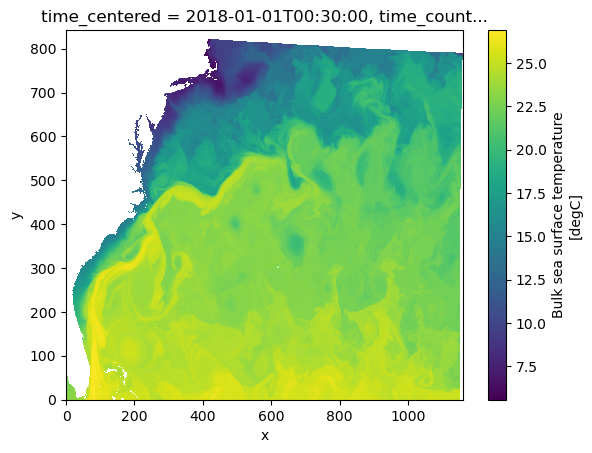

In [22]:
dsGS.tos[0].plot()

In [23]:
dsGS

<xarray.Dataset> Size: 853MB
Dimensions:               (time_counter: 24, axis_nbounds: 2, y: 843, x: 1160)
Coordinates:
    nav_lat               (y, x) float32 4MB 25.01 25.01 25.01 ... 44.04 44.04
    nav_lon               (y, x) float32 4MB -81.97 -81.94 ... -50.09 -50.06
    time_centered         (time_counter) datetime64[ns] 192B ...
  * time_counter          (time_counter) datetime64[ns] 192B 2018-01-01T00:30...
Dimensions without coordinates: axis_nbounds, y, x
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds, y, x) datetime64[ns] 376MB ...
    time_counter_bounds   (time_counter, axis_nbounds, y, x) datetime64[ns] 376MB ...
    tos                   (time_counter, y, x) float32 94MB 23.16 23.18 ... nan
Attributes: (12/14)
    Conventions:  CF-1.8
    NCO:          netCDF Operators version 5.1.9 (Homepage = http://nco.sf.ne...
    area:         Global
    contact:      https://marine.copernicus.eu/contact
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    description:  ocean T grid variables
    ...           ...
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    references:   http://marine.copernicus.eu
    source:       MOI ORCA36
    title:        hourly mean fields from ORCA36 free model
    uuid:         0e498b51-e9f1-4e9c-934c-300649bbf6ca

In [29]:
pip install cartopy cmocean


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 5.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import numpy as np

Text(0.5, 1.05, 'Mean sea surface temperature')

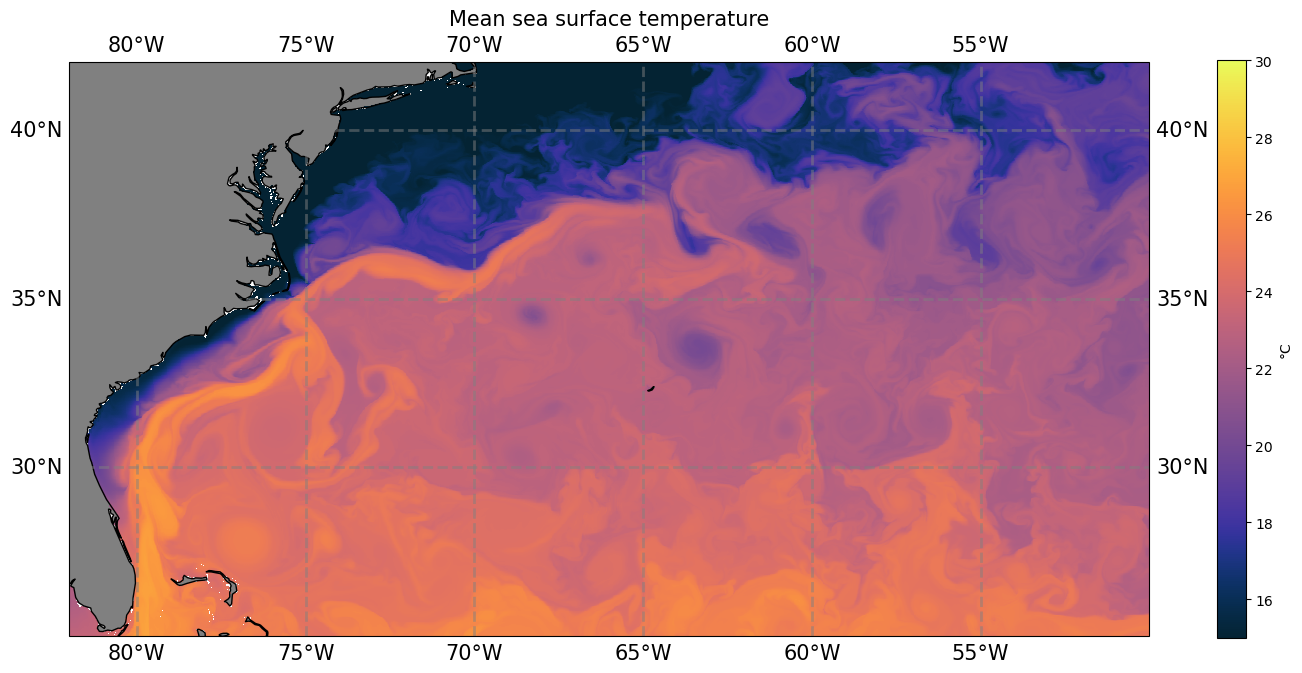

In [38]:
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())

pcolor=ax.pcolormesh(dsGS.nav_lon,dsGS.nav_lat,dsGS.tos[0],cmap=cmocean.cm.thermal,vmin=15, vmax=30, transform=ccrs.PlateCarree())
ax.set_extent([min_lonGS, max_lonGS, min_latGS, max_latGS-2])

ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
gl.xlocator = mticker.FixedLocator(np.arange(-90,-50,5))
gl.ylocator = mticker.FixedLocator(np.arange(20,50,5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
#gl.xlabels_top = False
#gl.ylabels_left = False

cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.75,label='°C')
#ax.text(0.75, 0.25, 'AVISO',fontsize=15, color='white', transform=ax.transAxes)
ax.set_title('Mean sea surface temperature',size=15,y=1.05)

